In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from utils import *

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
folder = "experiments_final"

results = get_results(folder, method='mean')

/Users/alitzel/Library/CloudStorage/OneDrive-Personal/ETH/Semester4/HPC_W&C/HPC4WC_proj5/utils.py:216: RuntimeWarning: Mean of empty slice
  ratio_1_1 = np.nanmean(ratio_1_1_masked, 0)
/Users/alitzel/Library/CloudStorage/OneDrive-Personal/ETH/Semester4/HPC_W&C/HPC4WC_proj5/utils.py:217: RuntimeWarning: Mean of empty slice
  ratio_2_1 = np.nanmean(ratio_2_1_masked, 0)
/Users/alitzel/Library/CloudStorage/OneDrive-Personal/ETH/Semester4/HPC_W&C/HPC4WC_proj5/utils.py:218: RuntimeWarning: Mean of empty slice
  ratio_1_2 = np.nanmean(ratio_1_2_masked, 0)
/Users/alitzel/Library/CloudStorage/OneDrive-Personal/ETH/Semester4/HPC_W&C/HPC4WC_proj5/utils.py:219: RuntimeWarning: Mean of empty slice
  ratio_4_1 = np.nanmean(ratio_4_1_masked, 0)
/Users/alitzel/Library/CloudStorage/OneDrive-Personal/ETH/Semester4/HPC_W&C/HPC4WC_proj5/utils.py:220: RuntimeWarning: Mean of empty slice
  ratio_1_4 = np.nanmean(ratio_1_4_masked, 0)


In [4]:
sizes = ['small', 'medium', 'large']
ratios = ["1:1","2:1","1:2","4:1","1:4"]

# These are divisors of 72. This allows exact packing inside one Grace CPU (72 cores), more optimum.
# More interpretable
threads_vals = [1,2,3,4,6,8,9,12,18,24,36,64]
ranks_vals   = [1,2,3,4,6,8,9,12,18,24,36,64,72]

# threads_vals = np.arange(1,64)
# ranks_vals = np.arange(1,72)

(<Figure size 600x380 with 1 Axes>,
 <Axes: title={'center': 'Best speedups'}, xlabel='Domain size (constant area)', ylabel='Speedup'>)

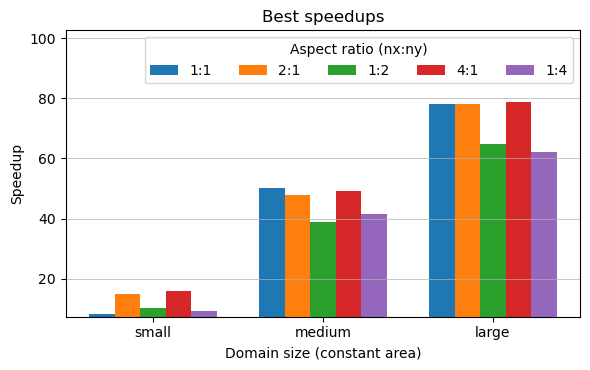

In [5]:
best_speedups = get_best_speedups(results, sizes, ratios, threads_vals, ranks_vals)
grouped_shape_bars(best_speedups, sizes, ratios, metric_name="Speedup", ylim_pad=0.3, title="Best speedups", savepath=None)

[<Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>]

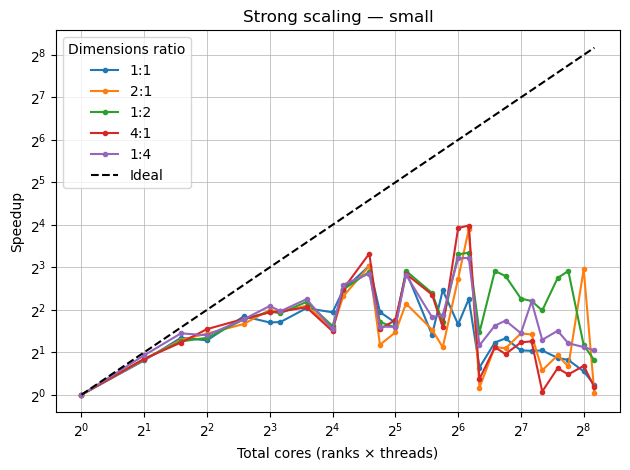

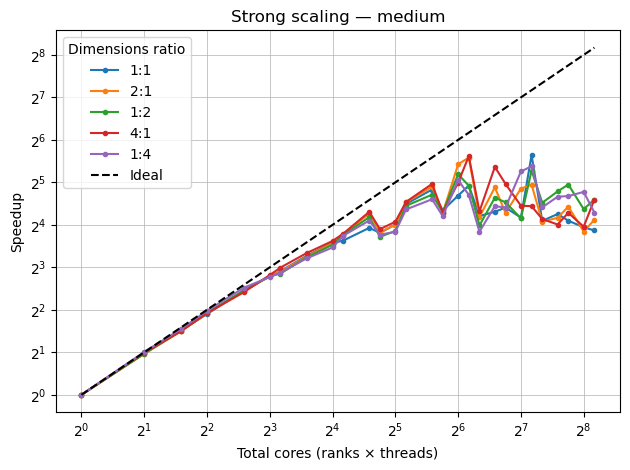

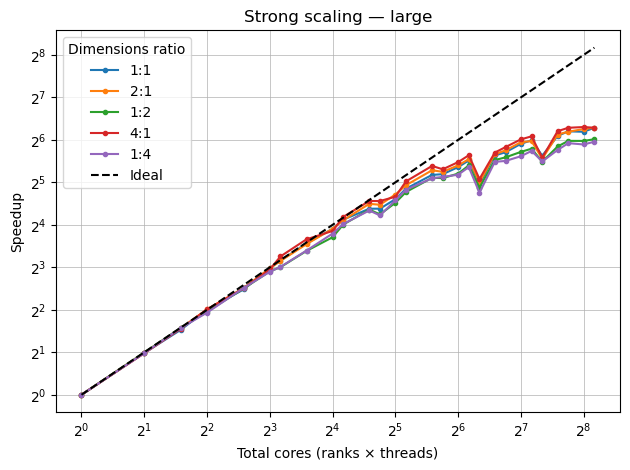

In [6]:
curves = build_curves(results, sizes, ratios, threads_vals, ranks_vals, metric='speedup')
plot_by_size(curves, sizes, ratios, ylabel="Speedup", title="Strong scaling (Runtime)", save=None)

In [7]:
for size in sizes:
    for ratio in ratios:
        print(size, ratio, 
              "Best speedup: ", "{:.1f}".format(best_speedups[size][ratio]['value']), 
              " OMP: ", best_speedups[size][ratio]['threads_ranks'][0], 
              " MPI: ", best_speedups[size][ratio]['threads_ranks'][1])

small 1:1 Best speedup:  8.2  OMP:  1  MPI:  24
small 2:1 Best speedup:  14.9  OMP:  1  MPI:  72
small 1:2 Best speedup:  10.2  OMP:  1  MPI:  72
small 4:1 Best speedup:  15.8  OMP:  1  MPI:  72
small 1:4 Best speedup:  9.3  OMP:  1  MPI:  72
medium 1:1 Best speedup:  50.0  OMP:  2  MPI:  72
medium 2:1 Best speedup:  48.0  OMP:  1  MPI:  72
medium 1:2 Best speedup:  38.8  OMP:  2  MPI:  72
medium 4:1 Best speedup:  49.1  OMP:  1  MPI:  72
medium 1:4 Best speedup:  41.6  OMP:  2  MPI:  72
large 1:1 Best speedup:  78.0  OMP:  4  MPI:  72
large 2:1 Best speedup:  78.1  OMP:  4  MPI:  72
large 1:2 Best speedup:  64.7  OMP:  4  MPI:  72
large 4:1 Best speedup:  78.9  OMP:  4  MPI:  64
large 1:4 Best speedup:  62.1  OMP:  4  MPI:  72


[<Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>]

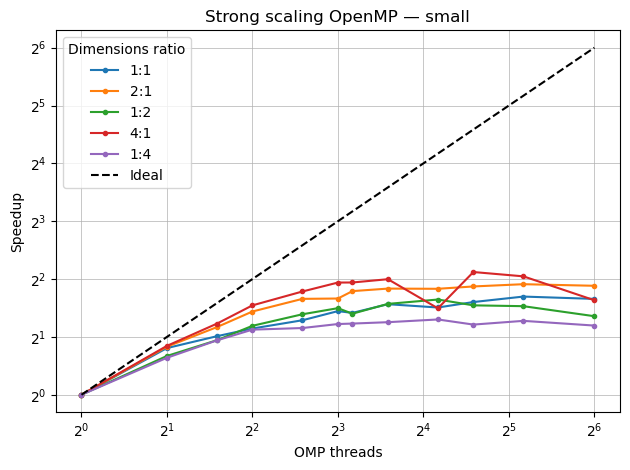

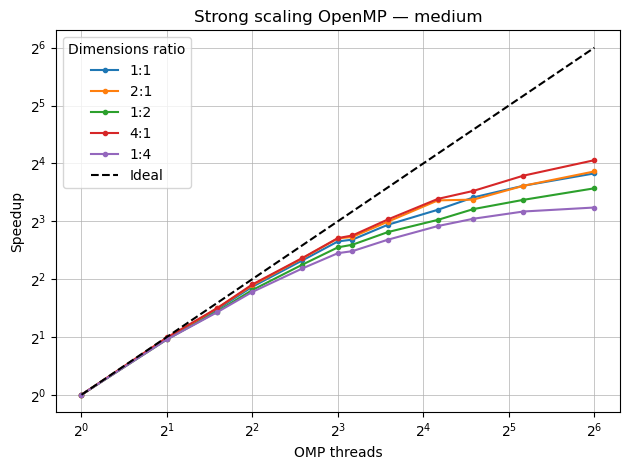

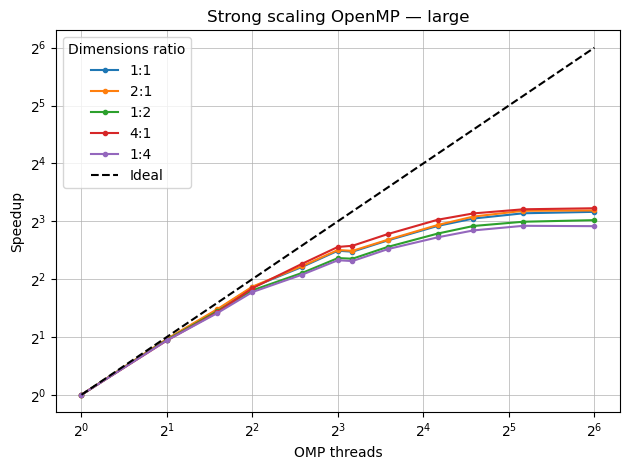

In [8]:
plot_ss_OMP(results, sizes, ratios, threads_vals, rank=1, ylabel="Speedup", save=None)

[<Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>]

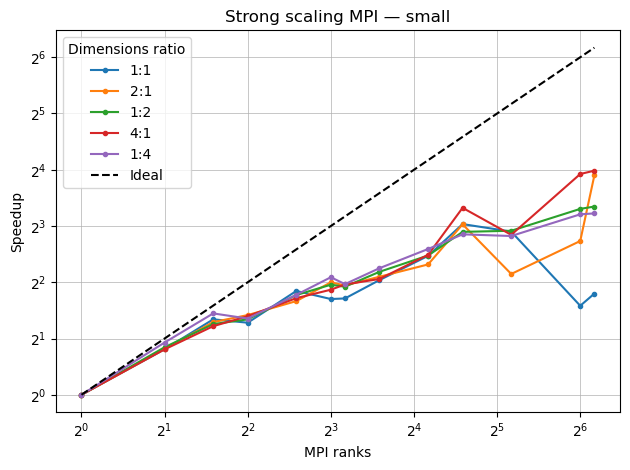

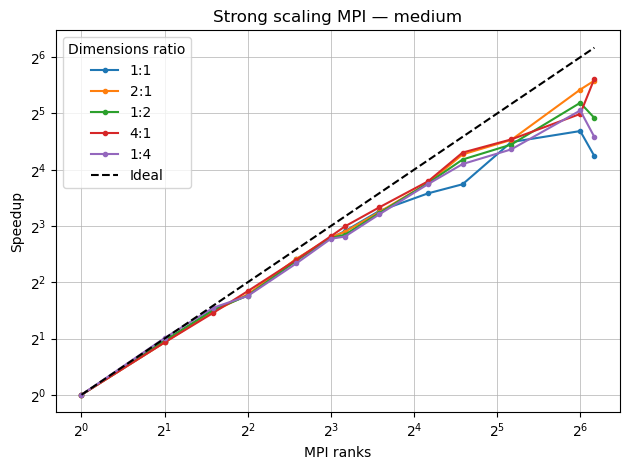

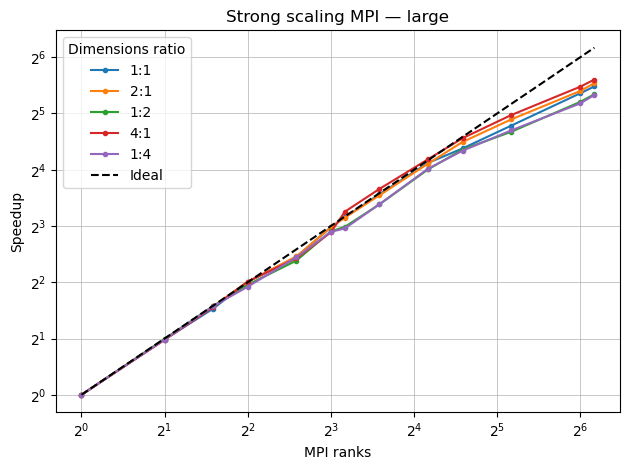

In [ ]:
plot_ss_MPI(results, sizes, ratios, 1, ranks_vals, ylabel="Speedup", save=None)